In [1]:
import pandas as pd
from base64 import b64decode
from io import BytesIO
from PIL import Image

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../../post2ctr_dataset.csv")

In [3]:
df.head(2)

,view,like,comment,hide,expand,open_photo,open,share_to_message,text,photo
0,10869,185,0,2,0,1947,14,20,NaN,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...
1,9083,227,1,7,4,958,23,2,• &#128571;,/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBw...


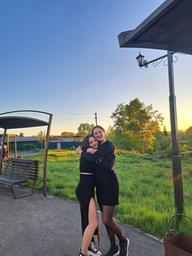

In [4]:
img = Image.open(BytesIO(b64decode(df.loc[1, "photo"])))
img

In [5]:
df.loc[1, "text"]

'• &#128571;'

In [6]:
unique_shapes = set()

def insert(cell):
    img = Image.open(BytesIO(b64decode(cell["photo"])))
    unique_shapes.add(img.size)

df.apply(insert, axis=1)
print(min(unique_shapes), max(unique_shapes))

(64, 256) (256, 256)


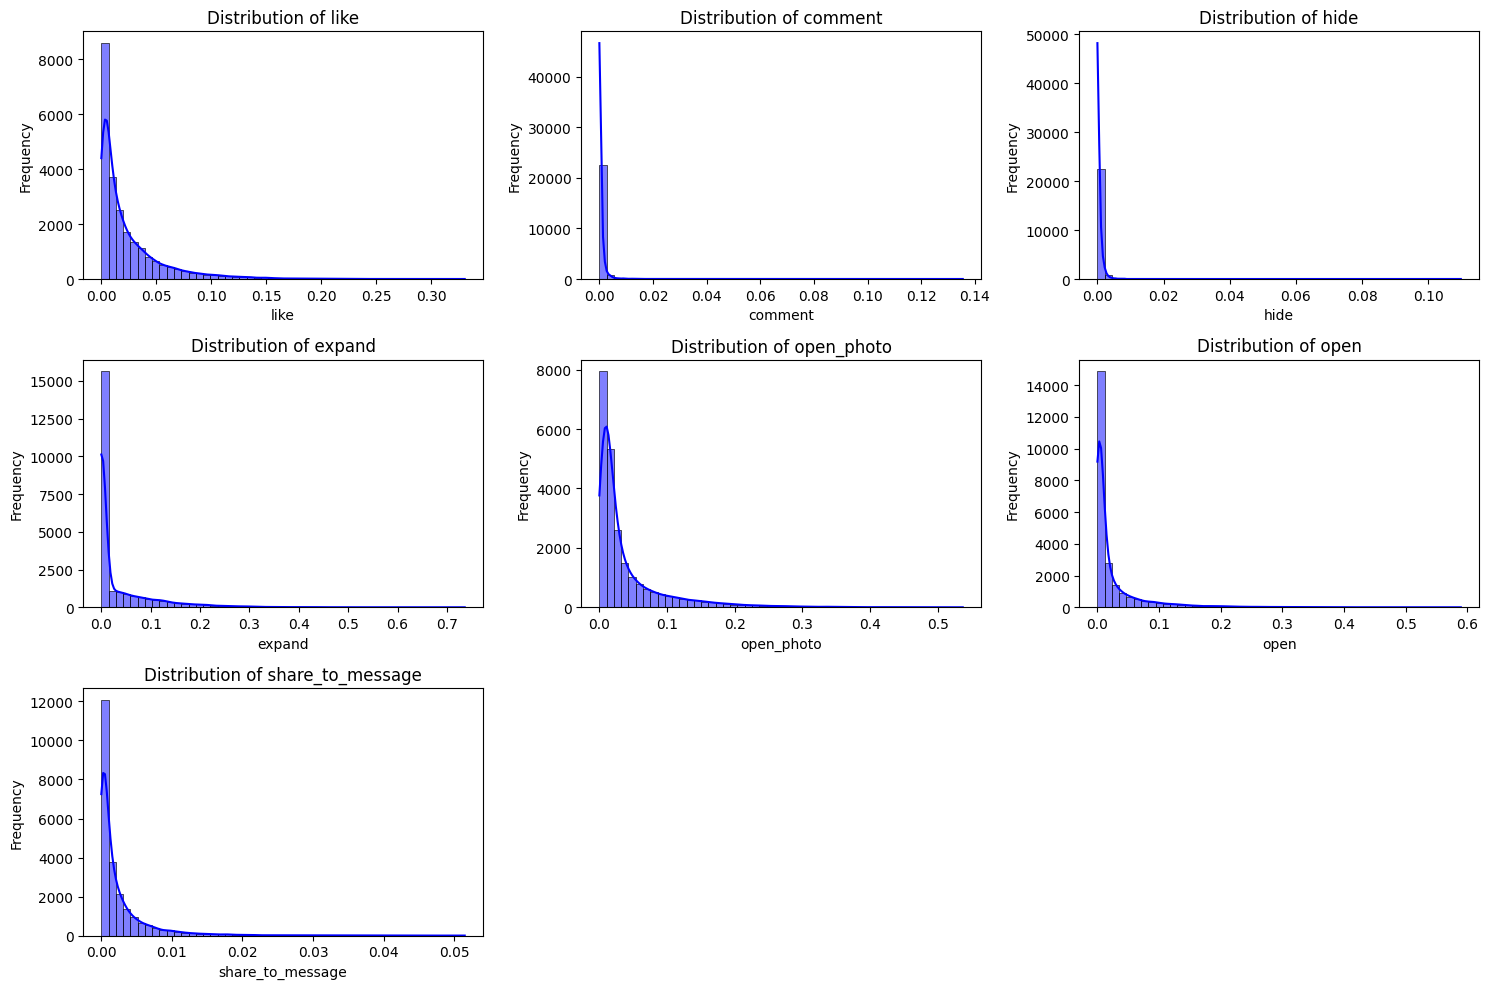

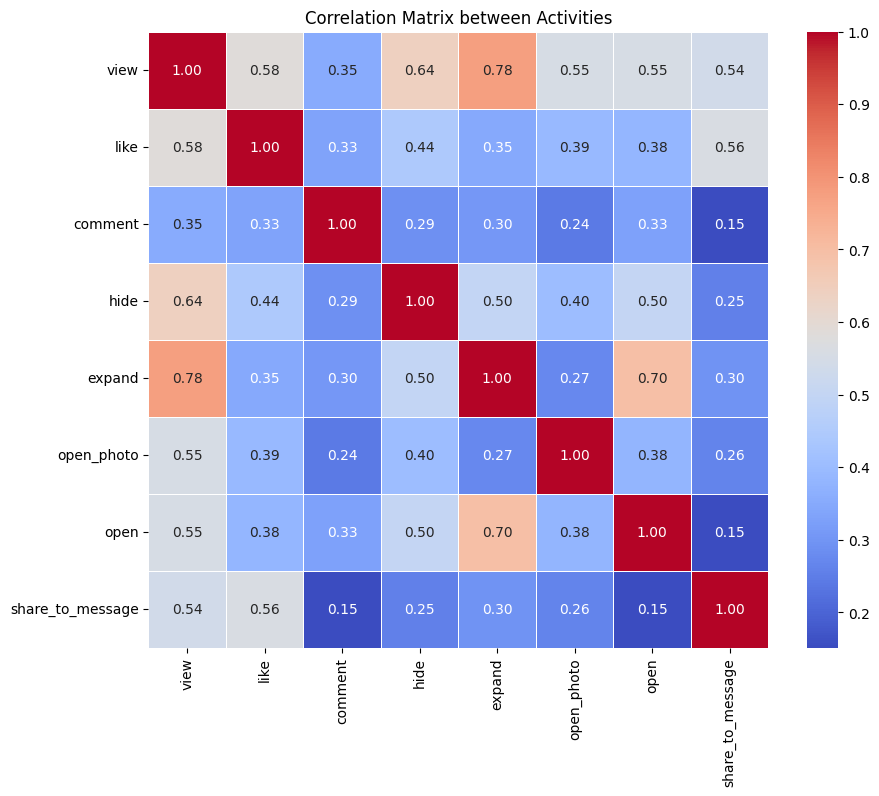

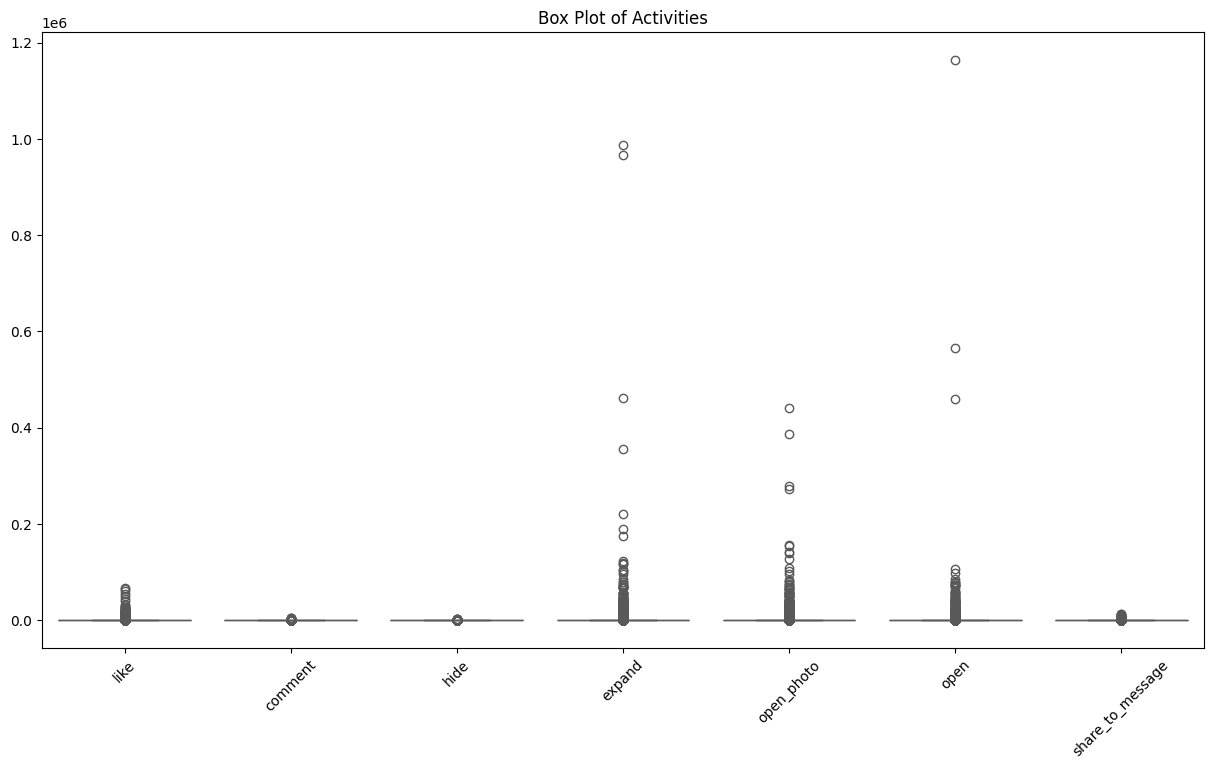

In [14]:
activities = ["like", "comment", "hide", "expand", "open_photo", "open", "share_to_message"]

plt.figure(figsize=(15, 10))
for i, activity in enumerate(activities, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[activity] / df["view"], bins=50, kde=True, color='blue')
    plt.title(f'Distribution of {activity}')
    plt.xlabel(activity)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

corr_matrix = df[["view"] + activities].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix between Activities')
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[activities], palette="Set2")
plt.xticks(rotation=45)
plt.title('Box Plot of Activities')
plt.show()

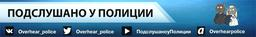

In [10]:
image = 1
for row in df.itertuples():
    img = Image.open(BytesIO(b64decode(row[10])))
    if img.size[1] < 40:
        image = img
image

In [16]:
def check_len(cell):
    return len(str(cell["text"]).split())

df["len"] = df.apply(check_len, axis=1)
display(max(df["len"]))

2662

In [17]:
import smogn
# https://github.com/nickkunz/smogn
from sklearn.model_selection import train_test_split
import numpy as np
df = pd.read_csv("../../post2ctr_dataset.csv")
X = df["photo"]
y = df["open_photo"] / df["view"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smoter = sv.ADASYN(regression=True)
X_resampled, y_resampled = smoter.sample(np.array(X_train), np.array(y_train))

sns.histplot(df[activity] / df["view"], bins=50, kde=True, color='blue')
plt.title(f'Distribution of {activity}')
plt.xlabel(activity)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

AttributeError: module 'smote_variants' has no attribute 'SMOTER'